# Intro to Computer Vision


In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import math

Import Dataset


In [2]:
mnist = keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Print data format


In [3]:
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

Normalise Data (0 ... 1)


In [4]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Define Neural Network Model/Layers


In [5]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(),  # flatten the image input
        keras.layers.Dense(
            128, activation=tf.nn.relu
        ),  # relu is return x if x > 0 else 0
        keras.layers.Dense(10, activation=tf.nn.softmax),  # Output layer,
    ]
)

Compile Model (Defining optimizer and loss function)


In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

Callback to stop training when model has reached 90% accuracy


In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") > 0.9:
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = myCallback()

Train Model


In [8]:
model.fit(training_images, training_labels, epochs=8, callbacks=[callbacks])

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7800 - loss: 0.6335
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8596 - loss: 0.3850
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8758 - loss: 0.3392
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8826 - loss: 0.3197
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8917 - loss: 0.2938
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8986 - loss: 0.2750
Epoch 7/8
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9041 - loss: 0.2627
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9041 - loss: 0.2627


Predict


In [ ]:
classifications = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Compare


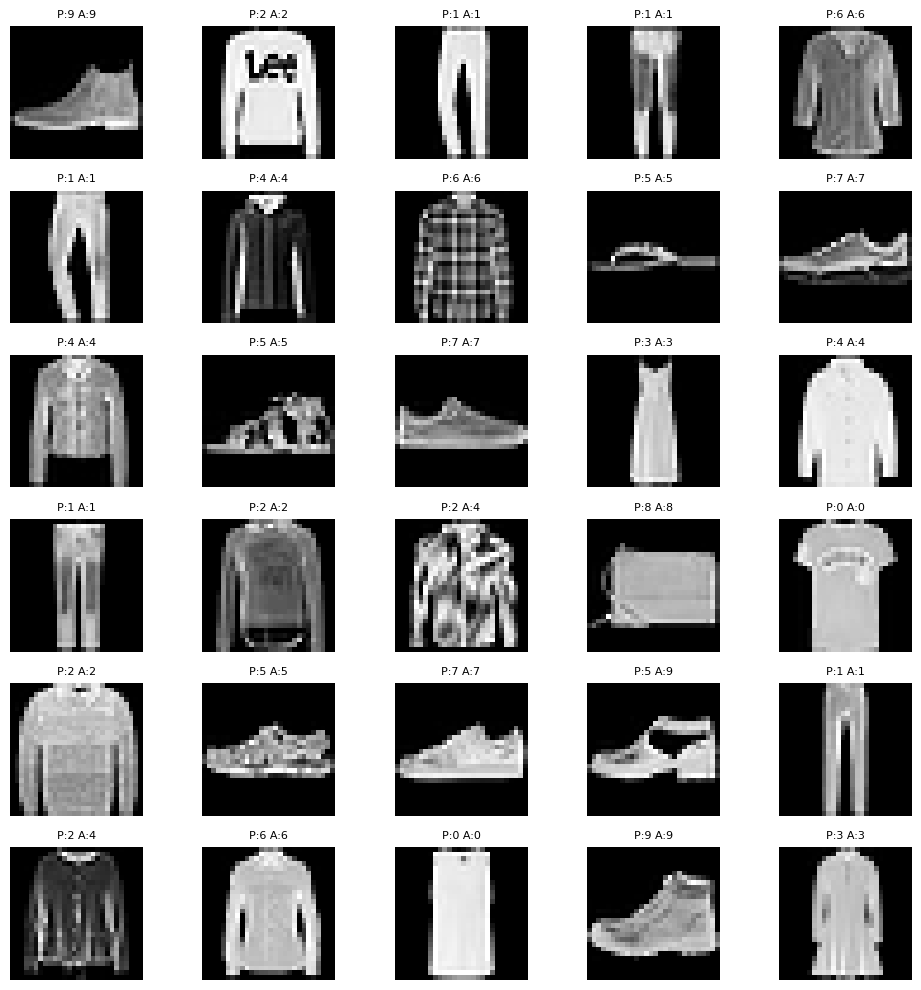

In [23]:
num_images = min(len(test_images), 30)
sqrt_num_images = math.floor(math.sqrt(num_images))
rows, cols = num_images // sqrt_num_images, sqrt_num_images
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(test_images[i], cmap="gray")
    pred = classifications[i].argmax()
    actual = test_labels[i]
    plt.title(f"P:{pred} A:{actual}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()